In [ ]:
#Q1. Can we use Bagging for regression problems?
#    - Yes. Bagging can be applied to regression (using, e.g., BaggingRegressor) by aggregating predictions of several regressors.

In [ ]:
# Q2. What is the difference between multiple model training and single model training?
'''   - Single model training builds one model on the entire dataset.
     Multiple model training (ensemble methods) builds several models on different subsets (or with different weights) and aggregates their predictions to improve generalization'''

In [ ]:

# Q3. Explain the concept of feature randomness in Random Forest.
'''   - In Random Forest, at each split a random subset of features is considered rather than all features.
     This decorrelates the trees and enhances the ensemble’s diversity.'''

In [ ]:
#Q4. What is OOB (Out-of-Bag) Score
''' 
part of training data is not used in a model training for individual model.this data is act as validation data for each specific individual decesion tree. the evaluation score of this data is known as OOB Score.
'''

In [ ]:
#Q5. How can you measure the importance of features in a Random Forest model
'''
In random forest we used impurity measures for finding a importance of features such Gini and Entropy. whichever feature have maximum value of Gini or Entropy we can used it for splitting. we can calculate gini importance using feature_importance attribute in scikit-learn. 

Measures the reduction in Gini impurity when a feature is used to split the dataset 
The higher the Gini importance, the more important the feature 
'''

In [ ]:
#Q6. Explain the working principle of a Bagging Classifier
'''
In bagging classifier we train the base learners on dataset and take a voting a of predicted values. then select a majority voting as the final prediction result.
'''

In [ ]:
#Q7. How do you evaluate a Bagging Classifier’s performance
'''
using classification ecaluation metrics such as accuracy , precision , recall and confusion metrics. 
'''

In [ ]:
#Q8. How does a Bagging Regressor work
'''
in baghing the model take the average of base learners output as final prediction result.
'''

In [ ]:
#Q9.  What is the main advantage of ensemble techniques
'''
Ensemble techniques prune the model overfitting problem.
'''

In [ ]:
#Q10. What is the main challenge of ensemble methods
'''
The main challange of ensemble methods is to obtain base models that make different kind of errors. 
in ensemble methods high accuracy can be achieved if base models misclassify different traing examples.
'''

In [ ]:
#Q11.  Explain the key idea behind ensemble techniques
'''
ensemble techniques are used to prevent the overfitting.
in ensemble techniques multiple decision trees are train on dataset. each model passed the error to next model.and next model focas on previous models error which helps to achieved high accuracy.
'''

In [ ]:
#Q12.  What is a Random Forest Classifier
''''
Random Forest classifier is a bagging ensemble technique which is used to solve the classification problem. 
In random forest we train a multiple base models(decision tree) on dataset and take their mejority voting as prediction result. 
'''

In [ ]:
#Q13.  What are the main types of ensemble techniques
'''
Ensemble have techniques such as Bagging , Boosting and Stacking
Bagging:
in bagging multiple models or base learners are train parallely.take base learners  mejority voting as prediction result in classification problem and avg of base learners prediction as final prediction.

Boosting:
in boosting multiple models or weak learners are train sequentialy.
give the first weak learners error to next weak learner. that weak learner focus more on previous weak learners errors.
in boosting weak learner are known as decision stups which have only one level depth.

Stacking:
stacking is combination of bagging and boosting. 
in stacking multiple model are train and send there prediction to meta model which produce the final prediction. 
'''

In [ ]:
#Q14. What is ensemble learning in machine learning
'''
ensemble learning in machine learning combines multiple models to make predictions,aiming to improve accuracy and robustness compared to using single model.
'''

In [ ]:
#Q15. When should we avoid using ensemble methods
'''
If the dataset is small and the problem can be effectively handled by a simpler model (e.g., linear regression or decision trees), using ensemble methods can be overkill and unnecessarily complex.
'''

In [ ]:
#Q16. How does Bagging help in reducing overfitting
'''
by training multiple models on different subsets of data.
it trains large numbers of base learners in parallel.
'''

In [ ]:
#Q17. Why is Random Forest better than a single Decision Tree
'''
Decision tree is gready algorithm which recursevly split the data until each node is become pure node. it simply memorised the data which leads the overfitting.

and in random forest multiple decision trees (base learners) are train on different subsets of data and take their mejority voting as prediction result.
'''

In [ ]:
#Q18. What is the role of bootstrap sampling in Bagging
'''
bagging leverages a bootstraping sampling technique to create diverse samples. resampling technique is used to generate different subsets of training dataset. it does so by selecting data points at random and with replacement.
'''

In [ ]:
#Q19.  What are some real-world applications of ensemble techniques
'''
Remote sensing.
Land cover mapping.
Change detection.
Computer security.
Distributed denial of service.
Malware Detection.
Intrusion detection.
Face recognition
'''

In [ ]:
#Q20. What is the difference between Bagging and Boosting?
'''
Bagging: 
    in bagging we used random forest and custom bagging techniques.
    in random forest based learners are train on different subsets in parallel.
    in custom bagging multiple different algorithms are used to train the models on dataset.
    
Boosting:
    in boosting we used multiple techniques such as Adaboost, Gradient Boosting , XGBoost, CatBoost.
    in boosting train weak learners are train sequentialy and provide previous model error to next model which focus more on previous model error
'''

PRACTICAL

In [69]:
#Q21.  Train a Bagging Classifier using Decision Trees on a sample dataset and print model accuracy
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier , BaggingClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier


df = sns.load_dataset('tips')

encoder = LabelEncoder()

cat_col = ['sex','smoker','day','time']

for col in cat_col:
    df[col] = encoder.fit_transform(df[col])
    
x = df.drop('time',axis = 1)
y = df['time']  

x_train , x_test , y_train , y_test = train_test_split(x,y, test_size=0.25, random_state=2)

model = DecisionTreeClassifier()

clf = BaggingClassifier(estimator=model)

clf.fit(x_train,y_train)

y_pred = clf.predict(x_test)

score = accuracy_score(y_test, y_pred)
print('Accuracy score: ',score)

Accuracy score:  0.9508196721311475


In [141]:
#Q22. Train a Bagging Regressor using Decision Trees and evaluate using Mean Squared Error (MSE)

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.metrics import mean_squared_error

df = sns.load_dataset('tips')

cat_col = ['sex','smoker','time','day']

for col in cat_col:
    df[col] = encoder.fit_transform(df[col])
    
x = df.drop('total_bill',axis = 1)
y = df['total_bill']

x_train , x_test , y_train , y_test = train_test_split(x , y, test_size= 0.25, random_state= 2)

model1 = DecisionTreeRegressor()
reg = BaggingRegressor(model1 ,8, verbose=2)

reg.fit(x_train , y_train)

y_pred = reg.predict(x_test)

score = mean_squared_error(y_test, y_pred)
print('MSE score: ',score)


Building estimator 1 of 8 for this parallel run (total 8)...
Building estimator 2 of 8 for this parallel run (total 8)...
Building estimator 3 of 8 for this parallel run (total 8)...
Building estimator 4 of 8 for this parallel run (total 8)...
Building estimator 5 of 8 for this parallel run (total 8)...
Building estimator 6 of 8 for this parallel run (total 8)...
Building estimator 7 of 8 for this parallel run (total 8)...
Building estimator 8 of 8 for this parallel run (total 8)...
MSE score:  38.694057599278516


In [163]:
#Q23. Train a Random Forest Classifier on the Breast Cancer dataset and print feature importance scores
from sklearn.datasets import load_breast_cancer
df = load_breast_cancer()

df1 = pd.DataFrame(df.data , columns= df.feature_names)
df1['target'] =df.target
x = df1.drop('target',axis = 1)
y = df['target']

x_train , x_test, y_train,y_test = train_test_split(x, y , test_size=0.25,random_state=42)

from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(criterion='entropy',oob_score=True)

model.fit(x_train,y_train)
y_pred = model.predict(x_test)

score = accuracy_score(y_test , y_pred)
print('Accuracy score: ',score)

print('feature importance: ',model.feature_importances_)




Accuracy score:  0.965034965034965
feature importance:  [0.03092776 0.02157692 0.03583377 0.07496085 0.0058863  0.0205131
 0.04026275 0.11184254 0.0058808  0.00581012 0.01529849 0.00328288
 0.01195047 0.03792204 0.00519713 0.00580448 0.00611507 0.00736609
 0.00544771 0.00396837 0.07401001 0.03163426 0.08282917 0.1050566
 0.01645453 0.01185637 0.03598819 0.17002045 0.00904694 0.00725586]


In [164]:
#Q24. Train a Random Forest Regressor and compare its performance with a single Decision Tree

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

model = DecisionTreeClassifier()
model1 = RandomForestClassifier()

model.fit(x_train , y_train)
model1.fit(x_train,y_train)

y_pred = model.predict(x_test)
y_pred1 = model1.predict(x_test)

score = accuracy_score(y_test , y_pred)
score1 = accuracy_score(y_test , y_pred1)

print('Random forest classifier score: ',score1)
print('decision tree classifier score: ',score)

Random forest classifier score:  0.972027972027972
decision tree classifier score:  0.9440559440559441


In [61]:
#Q25. Compute the Out-of-Bag (OOB) Score for a Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(oob_score=True)

model.fit(x_train , y_train)

y_pred = model.predict(x_test)

print('OOB Score: ',model.oob_score_)

OOB Score:  0.9553990610328639


In [64]:
#Q26. Train a Bagging Classifier using SVM as a base estimator and print accuracy
from sklearn.ensemble import BaggingClassifier
from sklearn.svm import SVC

model = SVC()
clf = BaggingClassifier(estimator=model)

clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)
score = accuracy_score(y_test , y_pred)

print('Score: ',score)

Score:  0.951048951048951


In [ ]:
#Q27.  Train a Random Forest Classifier with different numbers of trees and compare accuracy

trees = [10,20,30,40,50]
from sklearn.ensemble import RandomForestClassifier

for i in trees:
    model = RandomForestClassifier(n_estimators=i)
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    score = accuracy_score(y_test , y_pred)
    print(f"Accuracy Score of {i} tress : {score}")


Accuracy Score of 10 tress : 0.951048951048951
Accuracy Score of 20 tress : 0.972027972027972
Accuracy Score of 30 tress : 0.965034965034965
Accuracy Score of 40 tress : 0.965034965034965
Accuracy Score of 50 tress : 0.972027972027972


In [72]:
#Q28. Train a Bagging Classifier using Logistic Regression as a base estimator and print AUC score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
model = LogisticRegression()

clf = BaggingClassifier(estimator=model,)
clf.fit(x_train , y_train)
y_pred = clf.predict(x_test)
score = roc_auc_score(y_test , y_pred)
print('AUC Score: ',score*100)

AUC Score:  90.0


In [101]:
#Q29. Train a Random Forest Regressor and analyze feature importance scores
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()

model.fit(x_train , y_train)

importance_score = model.feature_importances_
features = x.columns

feature_importance = pd.DataFrame({'Feature':features,'Importance':importance_score})

feature_importance = feature_importance.sort_values(by='Importance',ascending=False)

print('\n-------Feature Importance--------\n')
print(feature_importance)


-------Feature Importance--------

  Feature  Importance
0     tip    0.549918
5    size    0.283222
2  smoker    0.056640
3     day    0.049426
1     sex    0.037275
4    time    0.023519


In [174]:
#Q30. Train an ensemble model using both Bagging and Random Forest and compare accuracy.
from sklearn.ensemble import RandomForestClassifier , BaggingClassifier

model = RandomForestClassifier()
model1 = BaggingClassifier()

model.fit(x_train,y_train)
y_pred = model.predict(x_test)

model1.fit(x_train,y_train)
y_pred1 = model1.predict(x_test)

score = accuracy_score(y_test , y_pred)
score1 = accuracy_score(y_test , y_pred1)

print('Random Forest Classifier score: ',score)
print('Bagging Classifier Score: ',score1)


Random Forest Classifier score:  0.965034965034965
Bagging Classifier Score:  0.951048951048951


In [110]:
#Q31. Train a Random Forest Classifier and tune hyperparameters using GridSearchCV
from sklearn.model_selection import GridSearchCV
model = RandomForestClassifier()
params = {
    'n_estimators':[20,40,60,80,120],
    'criterion':['gini', 'entropy', 'log_loss'],
    'max_depth':[2,3,5,6,7,8]
}

clf = GridSearchCV(estimator=model,param_grid=params,scoring='accuracy')
clf.fit(x_train , y_train)
clf

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [2, 3, 5, 6, 7, 8],
                         'n_estimators': [20, 40, 60, 80, 120]},
             scoring='accuracy')

In [149]:
#Q32. Train a Bagging Regressor with different numbers of base estimators and compare performance
n_estimator = [20,30,40,50,60,70,15]
for i in n_estimator:
    model = BaggingRegressor(n_estimators=i)
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    score = mean_squared_error(y_test , y_pred)
    print(f"Bagging Regressor MSE Score on n_estimator {i} is {score}")

Bagging Regressor MSE Score on n_estimator 20 is 33.46909406255901
Bagging Regressor MSE Score on n_estimator 30 is 32.77023756359924
Bagging Regressor MSE Score on n_estimator 40 is 34.545959794690845
Bagging Regressor MSE Score on n_estimator 50 is 30.958040895539078
Bagging Regressor MSE Score on n_estimator 60 is 35.24178605865062
Bagging Regressor MSE Score on n_estimator 70 is 34.65432694544341
Bagging Regressor MSE Score on n_estimator 15 is 32.051877142237714


In [162]:
#Q33.  Train a Random Forest Classifier and analyze misclassified samples
# Import libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# Load your dataset
# Replace 'your_data.csv' with your dataset file
data = sns.load_dataset('tips')

cat_col = ['time','smoker','sex','day']
for col in cat_col:
    data[col] = encoder.fit_transform(data[col])

# Separate features (X) and target variable (y)
X = data.drop(columns=['time'])  # Replace 'target' with the actual name of your target variable
y = data['time']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_classifier.fit(X_train, y_train)

# Make predictions
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

# Identify misclassified samples
misclassified_indices = np.where(y_test != y_pred)[0]

# Create a DataFrame of misclassified samples
misclassified_samples = X_test.iloc[misclassified_indices]
misclassified_samples['Actual'] = y_test.iloc[misclassified_indices]
misclassified_samples['Predicted'] = y_pred[misclassified_indices]

print("\nMisclassified Samples:")
print(misclassified_samples)


Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.91      0.93        35
           1       0.80      0.86      0.83        14

    accuracy                           0.90        49
   macro avg       0.87      0.89      0.88        49
weighted avg       0.90      0.90      0.90        49

Confusion Matrix:
[[32  3]
 [ 2 12]]

Misclassified Samples:
     total_bill  tip  sex  smoker  day  size  Actual  Predicted
101       15.38  3.0    0       1    0     2       0          1
226       10.09  2.0    0       1    0     2       1          0
220       12.16  2.2    1       1    0     2       1          0
100       11.35  2.5    0       1    0     2       0          1
243       18.78  3.0    0       0    3     2       0          1


In [ ]:
#Q34.  Train a Bagging Classifier and compare its performance with a single Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)
y_pred_dt = dt_classifier.predict(X_test)

# Evaluate the single Decision Tree Classifier
dt_accuracy = accuracy_score(y_test, y_pred_dt)
print("Decision Tree Classifier Accuracy:", dt_accuracy)

# Train a Bagging Classifier using Decision Tree as the base estimator
bagging_classifier = BaggingClassifier()
bagging_classifier.fit(X_train, y_train)
y_pred_bagging = bagging_classifier.predict(X_test)

# Evaluate the Bagging Classifier
bagging_accuracy = accuracy_score(y_test, y_pred_bagging)
print("Bagging Classifier Accuracy:", bagging_accuracy)



Decision Tree Classifier Accuracy: 0.9387755102040817
Bagging Classifier Accuracy: 0.9387755102040817


Classification Report:
              precision    recall  f1-score   support

       False       0.86      0.77      0.81        31
        True       0.67      0.78      0.72        18

    accuracy                           0.78        49
   macro avg       0.76      0.78      0.77        49
weighted avg       0.79      0.78      0.78        49



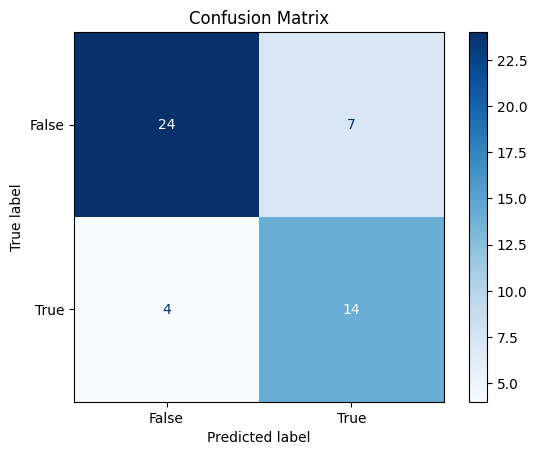

In [161]:
#Q35.  Train a Random Forest Classifier and visualize the confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
# Initialize and train the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Make predictions
y_pred = rf_classifier.predict(X_test)

# Print a classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=rf_classifier.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

In [160]:
#Q36. Train a Stacking Classifier using Decision Trees, SVM, and Logistic Regression, and compare accuracy
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.ensemble import StackingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import seaborn as sns

# Load the 'tips' dataset
tips = sns.load_dataset('tips')

# Preprocess the dataset
# Convert categorical variables to dummy/one-hot encoding
tips = pd.get_dummies(tips, drop_first=True)

# Separate features (X) and target variable (y)
X = tips.drop(columns=['tip'])  # 'tip' is the column to drop; adjust if needed
y = tips['tip'] > tips['tip'].median()  # Create a binary target (e.g., high tip vs. low tip)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define base models
decision_tree = DecisionTreeClassifier(random_state=42)
svm = SVC(probability=True, random_state=42)
logistic_regression = LogisticRegression(random_state=42)

# Create the Stacking Classifier
stacking_classifier = StackingClassifier(
    estimators=[
        ('decision_tree', decision_tree),
        ('svm', svm),
        ('logistic_regression', logistic_regression)
    ],
    final_estimator=LogisticRegression(),
    cv=5
)

# Train the Stacking Classifier
stacking_classifier.fit(X_train, y_train)

# Evaluate accuracy on test data
stacking_accuracy = accuracy_score(y_test, stacking_classifier.predict(X_test))
print(f"Stacking Classifier Accuracy: {stacking_accuracy:.2f}")

# Compare with individual models
decision_tree.fit(X_train, y_train)
svm.fit(X_train, y_train)
logistic_regression.fit(X_train, y_train)

dt_accuracy = accuracy_score(y_test, decision_tree.predict(X_test))
svm_accuracy = accuracy_score(y_test, svm.predict(X_test))
lr_accuracy = accuracy_score(y_test, logistic_regression.predict(X_test))

print(f"Decision Tree Accuracy: {dt_accuracy:.2f}")
print(f"SVM Accuracy: {svm_accuracy:.2f}")
print(f"Logistic Regression Accuracy: {lr_accuracy:.2f}")


Stacking Classifier Accuracy: 0.76
Decision Tree Accuracy: 0.65
SVM Accuracy: 0.73
Logistic Regression Accuracy: 0.73


In [173]:
#Q37. Train a Random Forest Classifier and print the top 5 most important features
importance_score = model.feature_importances_
features = x.columns
feature_importance = pd.DataFrame({'feature': features,'Importance':importance_score})
feature_importance = feature_importance.sort_values(by='Importance',ascending=False)
print('---------------Feature Importance--------------\n')
print(feature_importance.head())

---------------Feature Importance--------------

                feature  Importance
7   mean concave points    0.724681
21        worst texture    0.099496
20         worst radius    0.058993
23           worst area    0.034520
1          mean texture    0.026011


In [175]:
#Q38. rain a Bagging Classifier and evaluate performance using Precision, Recall, and F1-score
from sklearn.metrics import precision_score,recall_score,f1_score

model1.fit(x_train,y_train)
y_pred = model1.predict(x_test)

precision = precision_score(y_test,y_pred)
recall = recall_score(y_test,y_pred)
f1_scores = f1_score(y_test , y_pred)

print('Precision: ',precision)
print('recall: ',recall)
print('f1_score:',f1_scores)

Precision:  0.9655172413793104
recall:  0.9438202247191011
f1_score: 0.9545454545454546


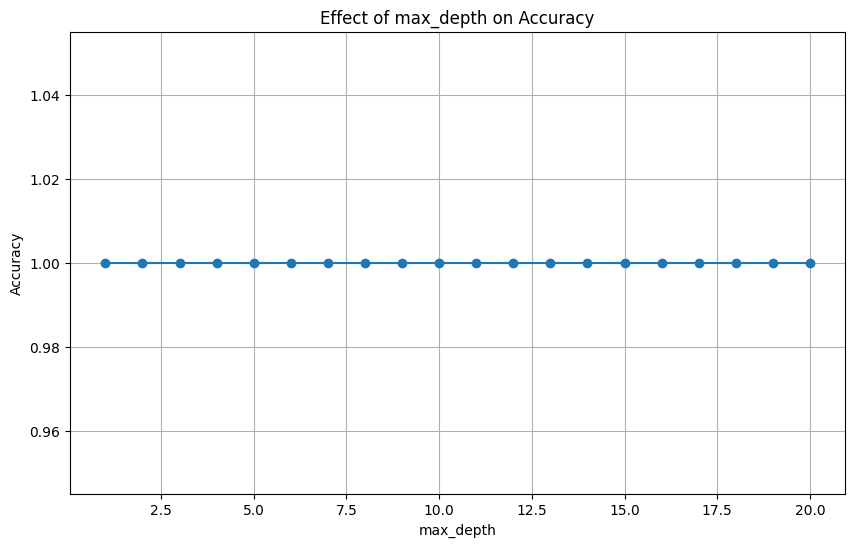

In [176]:
#Q39. Train a Random Forest Classifier and analyze the effect of max_depth on accuracy
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Load dataset (replace with your own dataset)
data = load_iris()
X, y = data.data, data.target

# Split dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize variables
max_depths = range(1, 21)  # Vary max_depth from 1 to 20
accuracies = []

# Train and evaluate Random Forest Classifier for each max_depth
for max_depth in max_depths:
    clf = RandomForestClassifier(max_depth=max_depth, random_state=42)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracies.append(accuracy_score(y_test, y_pred))

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(max_depths, accuracies, marker='o')
plt.title('Effect of max_depth on Accuracy')
plt.xlabel('max_depth')
plt.ylabel('Accuracy')
plt.grid()
plt.show()


In [178]:
#Q40. Train a Bagging Regressor using different base estimators (DecisionTree and KNeighbors) and compare  performance
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.datasets import load_diabetes  # Example dataset
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Load dataset
data = load_diabetes()  # Replace with your dataset
X, y = data.data, data.target

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Bagging with DecisionTreeRegressor
dst = DecisionTreeRegressor()
dt_regressor = BaggingRegressor(dst, n_estimators=10, random_state=42)
dt_regressor.fit(X_train, y_train)
dt_pred = dt_regressor.predict(X_test)

# Bagging with KNeighborsRegressor
knn = KNeighborsRegressor()
knn_regressor = BaggingRegressor(knn, n_estimators=10, random_state=42)
knn_regressor.fit(X_train, y_train)
knn_pred = knn_regressor.predict(X_test)

# Evaluate and compare
dt_mse = mean_squared_error(y_test, dt_pred)
dt_r2 = r2_score(y_test, dt_pred)

knn_mse = mean_squared_error(y_test, knn_pred)
knn_r2 = r2_score(y_test, knn_pred)

print(f"DecisionTreeRegressor - MSE: {dt_mse:.3f}, R²: {dt_r2:.3f}")
print(f"KNeighborsRegressor - MSE: {knn_mse:.3f}, R²: {knn_r2:.3f}")


DecisionTreeRegressor - MSE: 3237.527, R²: 0.400
KNeighborsRegressor - MSE: 3245.513, R²: 0.399


ROC-AUC Score: 0.997


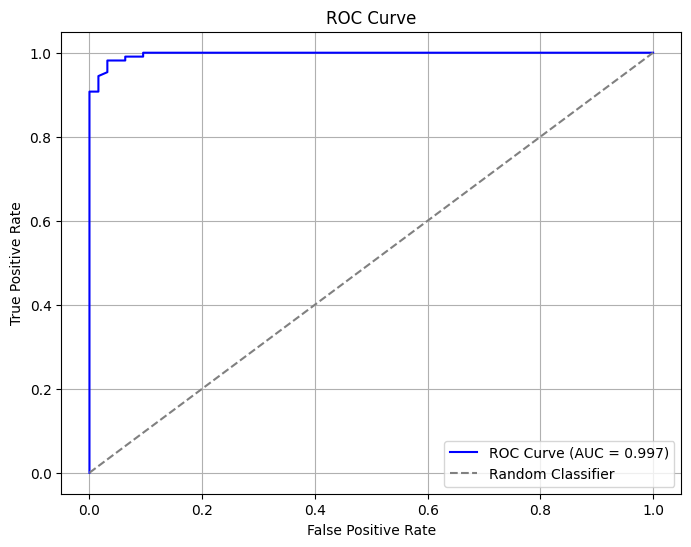

In [179]:
#Q41. Train a Random Forest Classifier and evaluate its performance using ROC-AUC Score
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_breast_cancer  # Example binary classification dataset
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Load dataset (use your dataset here)
data = load_breast_cancer()  # This dataset is for binary classification
X, y = data.data, data.target

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a Random Forest Classifier
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Predict probabilities for the positive class
y_pred_prob = clf.predict_proba(X_test)[:, 1]

# Compute ROC-AUC score
roc_auc = roc_auc_score(y_test, y_pred_prob)
print(f"ROC-AUC Score: {roc_auc:.3f}")

# Plot ROC curve (optional)
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f"ROC Curve (AUC = {roc_auc:.3f})")
plt.plot([0, 1], [0, 1], color='grey', linestyle='--', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid()
plt.show()


In [181]:
#Q42. Train a Bagging Classifier and evaluate its performance using cross-validation
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score

# Load dataset (replace with your dataset)
data = load_iris()  # Example dataset
X, y = data.data, data.target

# Initialize Bagging Classifier with a Decision Tree as the base estimator
bagging_clf = BaggingClassifier(
    estimator=DecisionTreeClassifier(),
    n_estimators=10,
    random_state=42
)

# Evaluate performance using cross-validation
cv_scores = cross_val_score(bagging_clf, X, y, cv=5, scoring='accuracy')  # 5-fold CV

# Print results
print(f"Cross-Validation Accuracy Scores: {cv_scores}")
print(f"Mean Accuracy: {cv_scores.mean():.3f}")
print(f"Standard Deviation: {cv_scores.std():.3f}")


Cross-Validation Accuracy Scores: [0.96666667 0.96666667 0.9        0.93333333 1.        ]
Mean Accuracy: 0.953
Standard Deviation: 0.034


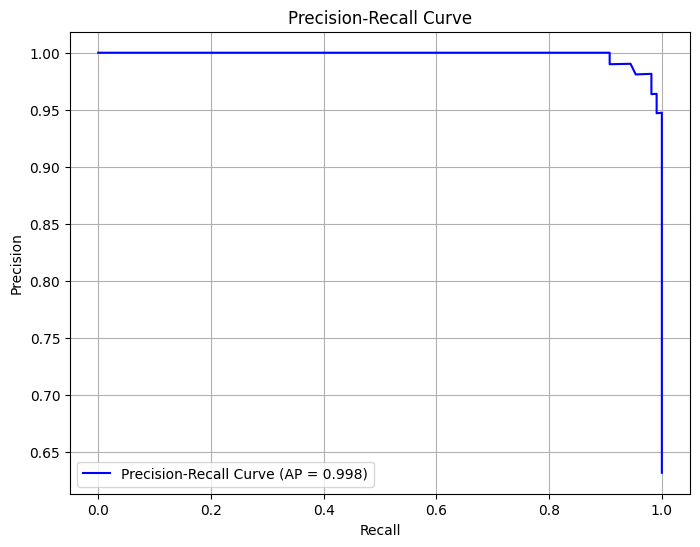

In [182]:
#Q43. Train a Random Forest Classifier and plot the Precision-Recall curve 
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_breast_cancer  # Example dataset for binary classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt

# Load dataset (replace with your dataset)
data = load_breast_cancer()
X, y = data.data, data.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the Random Forest Classifier
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Predict probabilities for the positive class
y_pred_prob = clf.predict_proba(X_test)[:, 1]

# Compute Precision-Recall metrics
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob)
avg_precision = average_precision_score(y_test, y_pred_prob)

# Plot the Precision-Recall Curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='blue', label=f"Precision-Recall Curve (AP = {avg_precision:.3f})")
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.grid()
plt.show()


In [183]:
#Q44. Train a Stacking Classifier with Random Forest and Logistic Regression and compare accuracy
from sklearn.ensemble import StackingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris  # Example dataset

# Load dataset
data = load_iris()
X, y = data.data, data.target

# Split dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define base estimators
base_estimators = [
    ('rf', RandomForestClassifier(random_state=42)),
    ('lr', LogisticRegression(random_state=42))
]

# Define stacking classifier
stacking_clf = StackingClassifier(
    estimators=base_estimators,
    final_estimator=LogisticRegression()  # Meta-classifier
)

# Train individual models and stacking classifier
rf = RandomForestClassifier(random_state=42)
lr = LogisticRegression(random_state=42)

rf.fit(X_train, y_train)
lr.fit(X_train, y_train)
stacking_clf.fit(X_train, y_train)

# Evaluate accuracy
rf_acc = accuracy_score(y_test, rf.predict(X_test))
lr_acc = accuracy_score(y_test, lr.predict(X_test))
stacking_acc = accuracy_score(y_test, stacking_clf.predict(X_test))

print(f"Random Forest Accuracy: {rf_acc:.3f}")
print(f"Logistic Regression Accuracy: {lr_acc:.3f}")
print(f"Stacking Classifier Accuracy: {stacking_acc:.3f}")


Random Forest Accuracy: 1.000
Logistic Regression Accuracy: 1.000
Stacking Classifier Accuracy: 1.000


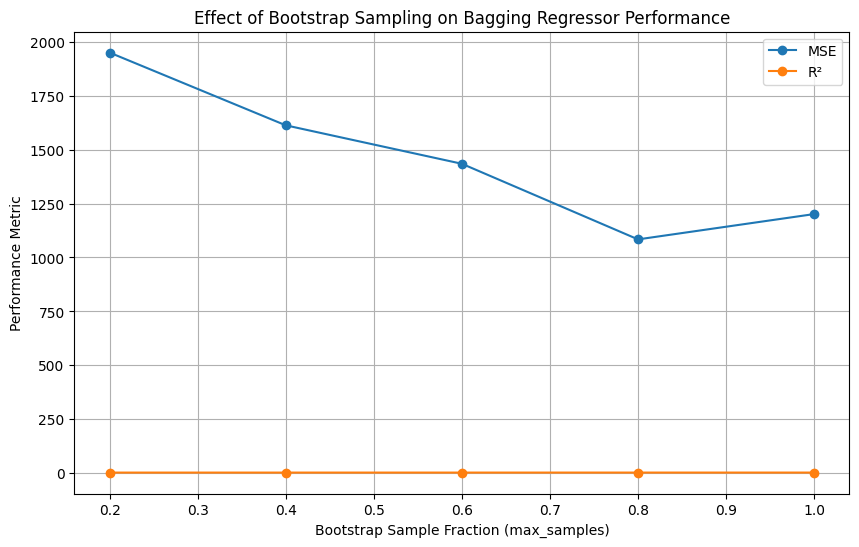

In [185]:
#Q45. Train a Bagging Regressor with different levels of bootstrap samples and compare performance
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Generate synthetic regression dataset (replace with your own data)
X, y = make_regression(n_samples=500, n_features=5, noise=0.2, random_state=42)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define bootstrap sample proportions to test
bootstrap_samples = [0.2, 0.4, 0.6, 0.8, 1.0]
mse_scores = []
r2_scores = []

# Train Bagging Regressor with different bootstrap levels
for sample_fraction in bootstrap_samples:
    bagging = BaggingRegressor(
        estimator=DecisionTreeRegressor(),
        n_estimators=10,
        max_samples=sample_fraction,
        random_state=42
    )
    bagging.fit(X_train, y_train)
    y_pred = bagging.predict(X_test)
    
    # Evaluate performance
    mse_scores.append(mean_squared_error(y_test, y_pred))
    r2_scores.append(r2_score(y_test, y_pred))

# Plot results
plt.figure(figsize=(10, 6))
plt.plot(bootstrap_samples, mse_scores, marker='o', label='MSE')
plt.plot(bootstrap_samples, r2_scores, marker='o', label='R²')
plt.title('Effect of Bootstrap Sampling on Bagging Regressor Performance')
plt.xlabel('Bootstrap Sample Fraction (max_samples)')
plt.ylabel('Performance Metric')
plt.legend()
plt.grid()
plt.show()
